In [33]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage 
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA

In [34]:
data = pd.read_csv("wine.csv")

In [35]:
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [36]:
data.shape

(178, 14)

In [37]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [39]:
type(data)

pandas.core.frame.DataFrame

In [40]:
data1 = data.iloc[:,1:]
data1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [41]:
DATA = data1.values
DATA

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [42]:
normal = scale(DATA)
normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [43]:
pca = PCA(n_components=3)
pca_values = pca.fit_transform(normal)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [44]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631])

In [45]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([36.2 , 55.41, 66.53])

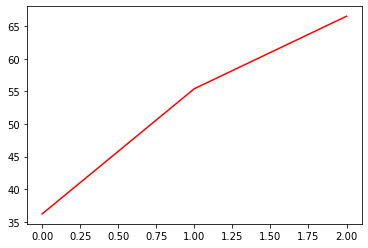

In [46]:
plt.plot(var1,color="red")

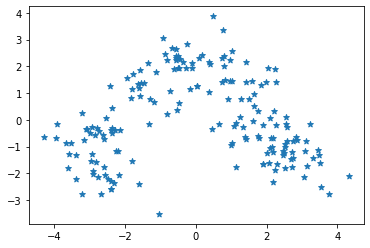

In [47]:
x = pca_values[:,0:1]
y = pca_values[:,1:2]
plt.scatter(x,y, marker='*')

In [48]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(pca_values)
df_norm

array([[0.79571551, 0.31636035, 0.44502757],
       [0.68421143, 0.49529033, 0.25765258],
       [0.71515416, 0.35788025, 0.56068773],
       [0.84005536, 0.18414993, 0.44397497],
       [0.56331498, 0.37412528, 0.66580576],
       [0.76887918, 0.24799101, 0.39833717],
       [0.70834173, 0.34340973, 0.36332375],
       [0.66910356, 0.2996944 , 0.47644818],
       [0.71456346, 0.36926748, 0.28338035],
       [0.73900886, 0.3822209 , 0.36260348],
       [0.81212824, 0.33057213, 0.41914796],
       [0.63842177, 0.40009122, 0.34179568],
       [0.67454394, 0.39367368, 0.37460304],
       [0.80995514, 0.34786272, 0.3404465 ],
       [0.89601639, 0.25065207, 0.33444109],
       [0.6938508 , 0.29429801, 0.48366041],
       [0.6804342 , 0.22735709, 0.54547303],
       [0.65294461, 0.29743813, 0.54176564],
       [0.81839668, 0.20811946, 0.4128317 ],
       [0.67162966, 0.35486058, 0.4451275 ],
       [0.77634597, 0.38247673, 0.42497329],
       [0.57113553, 0.43737389, 0.55606991],
       [0.

In [49]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])

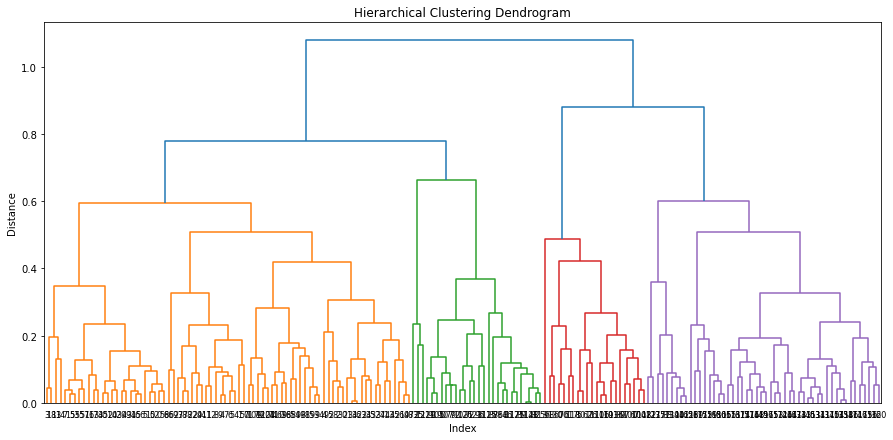

In [53]:
link = linkage(df_norm, method="complete",metric="euclidean")

plt.figure(figsize=(15, 7));
plt.title('Hierarchical Clustering Dendrogram');
plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(
    link,
    leaf_rotation=0.,  
    leaf_font_size=8., 
)
plt.show()


In [54]:
h_complete = AgglomerativeClustering(n_clusters=7, linkage='complete',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels

0      6
1      0
2      0
3      6
4      0
      ..
173    1
174    1
175    1
176    1
177    1
Length: 178, dtype: int64

In [55]:
data['clust']=cluster_labels
data.head
data.iloc[:,1:].groupby(data.clust).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
clust,,,,,,,,,,,,,,
0,13.073654,2.010769,2.345962,17.853846,101.153846,2.680192,2.692885,0.276538,1.965577,4.285385,1.063846,3.103846,856.076923,0.0
1,13.204878,3.363902,2.409024,21.158537,98.829268,1.666341,0.801463,0.435366,1.198049,7.779756,0.660976,1.645610,632.439024,1.0
2,12.429091,1.612727,1.984545,17.918182,91.772727,2.021818,1.668636,0.349545,1.211818,3.138636,1.044364,2.534091,522.863636,2.0
3,12.153200,2.035600,2.381200,21.808000,90.360000,2.020800,1.888800,0.427600,1.455200,2.769600,1.041200,2.736800,472.800000,3.0
4,12.533333,1.923333,3.016667,27.833333,127.333333,3.036667,3.550000,0.383333,1.916667,4.310000,1.123333,3.463333,760.000000,4.0
5,12.708889,3.463333,2.635556,24.444444,96.888889,1.858889,1.040000,0.560000,1.155556,4.647778,0.848889,2.180000,557.888889,5.0
6,13.985769,1.926154,2.481538,16.588462,111.923077,3.076923,3.245385,0.292692,2.025385,6.364615,1.076538,3.147308,1226.038462,6.0


C:\Users\suraj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


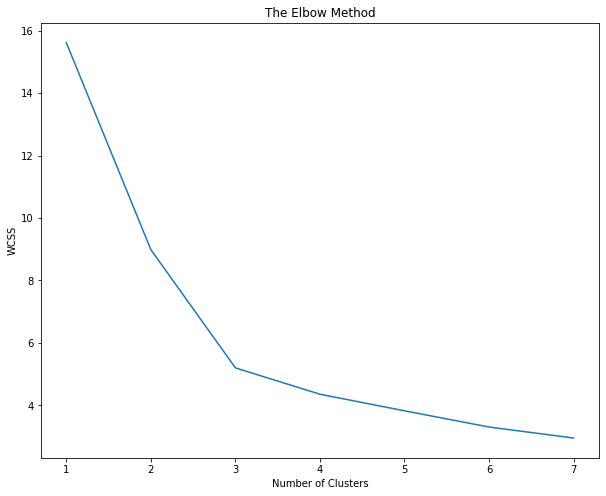

In [56]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 8):
    clf = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=8, random_state=0)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS

plt.plot(range(1, 8), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [57]:
clf = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=8,  random_state=0)
y_kmeans = clf.fit_predict(df_norm)

In [58]:
y_kmeans

array([3, 0, 3, 3, 5, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       0, 0, 0, 5, 3, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 0, 4, 0,
       0, 2, 2, 0, 2, 4, 4, 5, 0, 2, 2, 2, 0, 4, 2, 0, 4, 1, 4, 2, 4, 4,
       4, 4, 2, 4, 2, 4, 4, 0, 4, 2, 0, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2, 4,
       0, 4, 4, 4, 4, 4, 2, 4, 2, 2, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6,
       1, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 6, 1, 6, 6, 1, 1, 6, 6, 6, 6,
       6, 6])

In [59]:
clf.cluster_centers_

array([[0.62652764, 0.50315706, 0.42808702],
       [0.17323696, 0.40754329, 0.42090704],
       [0.40853729, 0.66283126, 0.35622656],
       [0.7286097 , 0.32517551, 0.43820512],
       [0.43513823, 0.63057983, 0.57312784],
       [0.61018854, 0.4032098 , 0.82845257],
       [0.2030434 , 0.24071015, 0.47716352]])

In [61]:
md=pd.Series(y_kmeans)
data['clust']=md 
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,6
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,6
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,6
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,6
